<a href="https://colab.research.google.com/github/manjulamishra/DS-Sprint-01-Dealing-With-Data/blob/master/Plotting_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

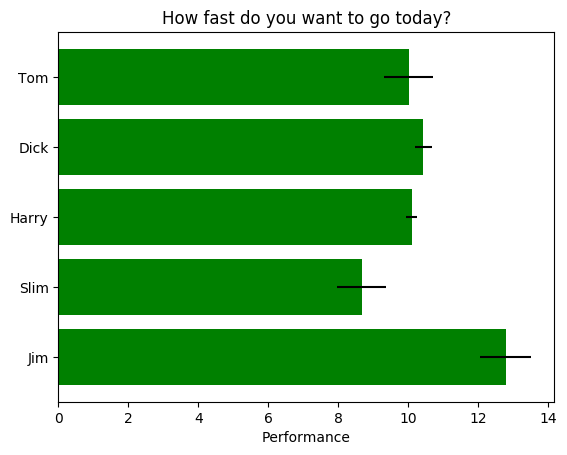

In [35]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

In [38]:
import pandas as pd
import numpy as np
water_treatment_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.data'
water_data = pd.read_csv(water_treatment_url, header=None)
#replace ?
water_data.replace('?',np.nan, inplace=True)
water_data.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101,1.50,7.8,NaN,407,166,66.3,4.5,2110,...,2000,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,NaN,443,214,69.2,6.5,2660,...,2590,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,NaN,528,186,69.9,3.4,1666,...,1888,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


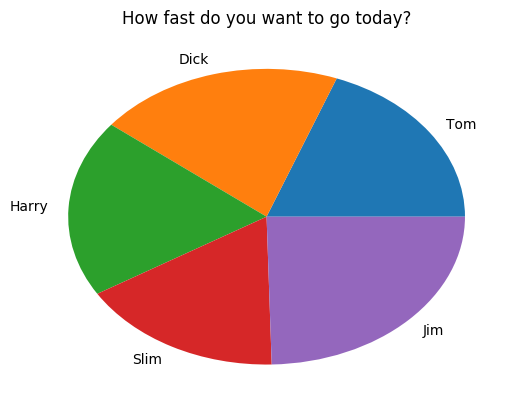

In [39]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


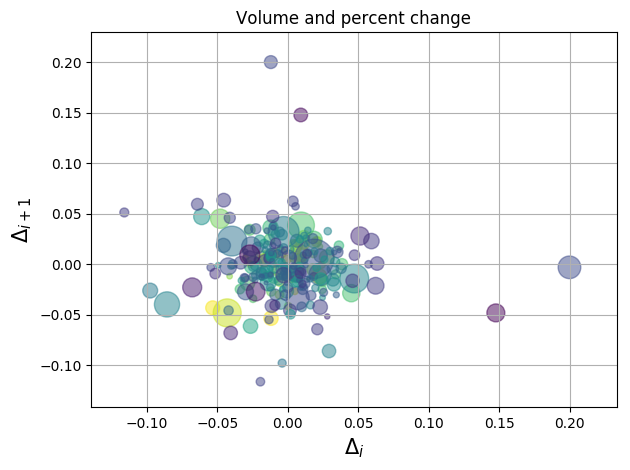

In [40]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

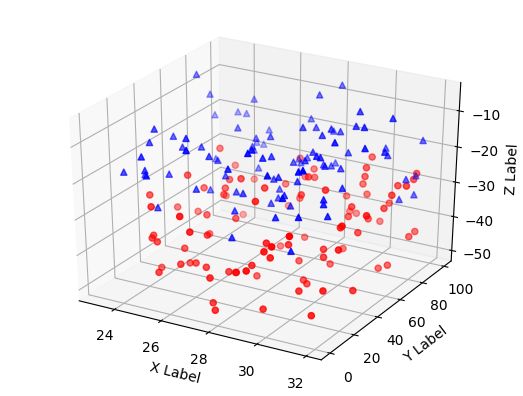

In [41]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Upload Housing dataset from UCI to make Plots


In [48]:
#Housing dataset
Housing_data_URL ='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
house_df_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', "RM", 
                  'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', "B",
                 'LSTAT', 'MEDV']
#the datafile is separated by spaces, delimiter ='\t' didn't work because the values are separated but we dont' know if it's exactly tab separated. 
'''imported pandas library
and the syntax for the header row'''
import pandas as pd
house_df = pd.read_csv(Housing_data_URL, delimiter = '\s+', header = None, names = house_df_names)
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [51]:
house_df['MEDV'].describe()


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


##Attributes of the housing dataset

1. Title: Boston Housing Data

. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.

##Import matplotlib for data visualization
This the housing data is from https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
This data did not have any NaN

### 1. Historgram plotting the Median Values fo the houses in Boston
the plot shows the concentration around the mean value of 22.5 and that's where the freqeucny is the highest. That means most of the houses were values around $22.5K. Histograms depict only one variable. X axis is always that variable and Y axis is always the frequency. The frequencies add up to the total number of observations. 

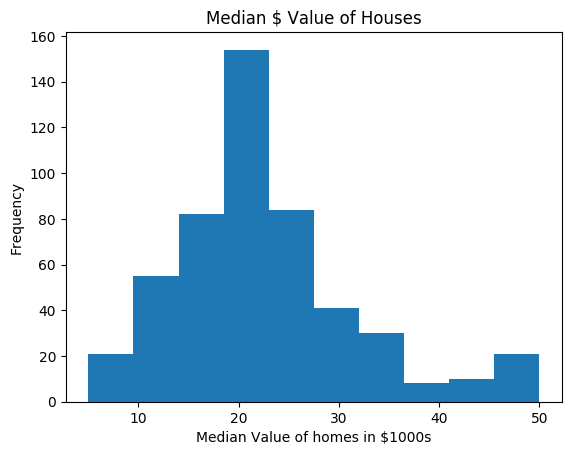

In [59]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(house_df['MEDV'])
plt.xlabel('Median Value of homes in $1000s')
plt.ylabel('Frequency')
plt.title("Median $ Value of Houses")
plt.show()

#### To check summary of a particular column

In [75]:
house_df['LSTAT'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

###2. Scatter plot of the Housing data
LSTAT is % lower status of the population and MEDV is median value in thousands of US Dollars. These two variables show a negative relationship. I dont completley understand what does LSTAT mean. All I can infere is that given higher median values of houses means lower % of lower status of the population. 

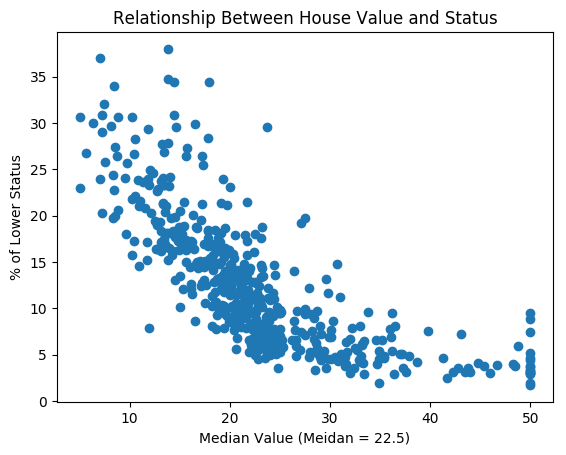

In [119]:
import matplotlib.pyplot as plt

plt.scatter(house_df['MEDV'], house_df['LSTAT'])
plt.xlabel("Median Value (Meidan = 22.5)")
plt.ylabel("% of Lower Status")
plt.title("Relationship Between House Value and Status")
plt.show()

#### This plot show a relationship between weighted distance from the employment center and the crime (per capita crime rate by town). 



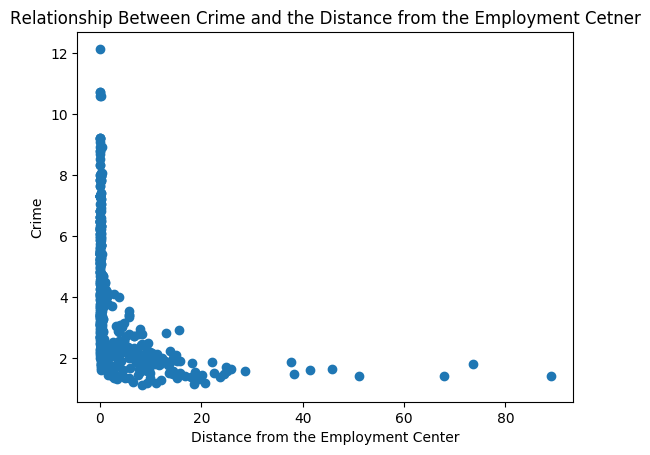

In [120]:
import matplotlib.pyplot as plt

plt.scatter(house_df['CRIM'], house_df['DIS'])
plt.xlabel("Distance from the Employment Center")
plt.ylabel("Crime")
plt.title("Relationship Between Crime and the Distance from the Employment Cetner")
plt.show()

Same crime and distance relationship through line graph

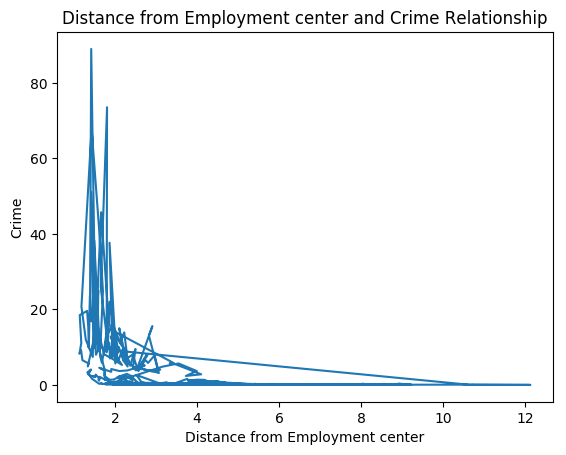

In [123]:
import matplotlib.pyplot as plt
plt.plot(house_df['DIS'], house_df['CRIM'])
plt.xlabel("Distance from Employment center")
plt.ylabel('Crime')
plt.title('Distance from Employment center and Crime Relationship')
plt.show()

###3. Bar plot of the same housing data

The varaibles ZN ( proportion of residential land zoned for lots over 25,000 sq.ft.) and INDUS (proportion of non-retail business acres per town) are plotted as bar graphs. 

This graph doesn't amke sense to me

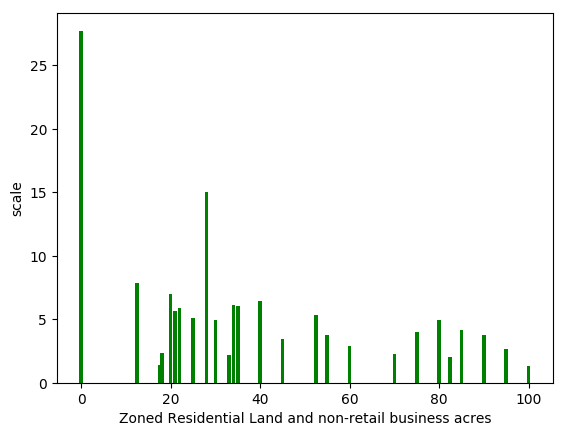

In [122]:
import matplotlib.pyplot as plt
plt.bar(house_df['ZN'],house_df['INDUS'],color=('G'))
plt.xlabel('Zoned Residential Land and non-retail business acres' )
plt.ylabel('scale')
plt.show()

In [0]:
means = 0

for x in house_df():
  means = x[]
  
  
  
  largest_profit = 0
most_profitable_company = 'name'
for each_company in companies:
  profit = each_company['revenue'] - each_company['expenses']
  if profit > largest_profit:
    largest_profit = profit
    most_profitable_company = each_company['Name']
    
print(largest_profit, most_profitable_company)

####Caluclating mean of each columns. For the entire dataframe, its '''dataframe.mean()'''

In [93]:
mean_medv = house_df['MEDV'].mean()
mean_zn = house_df['ZN'].mean()
mean_indus = house_df['INDUS'].mean()
mean_nox = house_df['NOX'].mean()
mean_age = house_df['AGE'].mean()
mean_lstat = house_df['LSTAT'].mean()
mean_tax = house_df['TAX'].mean()
print(mean_medv, mean_zn)

22.532806324110677 11.363636363636363


####Calculate standard deviation of each column. For the entire dataframe its '''dataframe.std()'''


In [0]:
house_df['MEDV'].std()
house_df.std()

In [112]:
house_df.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
MEDV        22.532806
dtype: float64

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.ylabel('')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()